# Parking Slot Detection




## Libraries  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import cv2                   
import os                   
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

## Data Initializing 

In [2]:
X=[]
Y=[]
def train_data(label,DIR):
    for img in os.listdir(DIR):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150,150))
        X.append(np.array(img))
        Y.append(str(label))
        
train_data('Avalible',"empty")
train_data('Not Available ',"occupied")

#merging occupied and empty car slots into an array

## Displaying Data

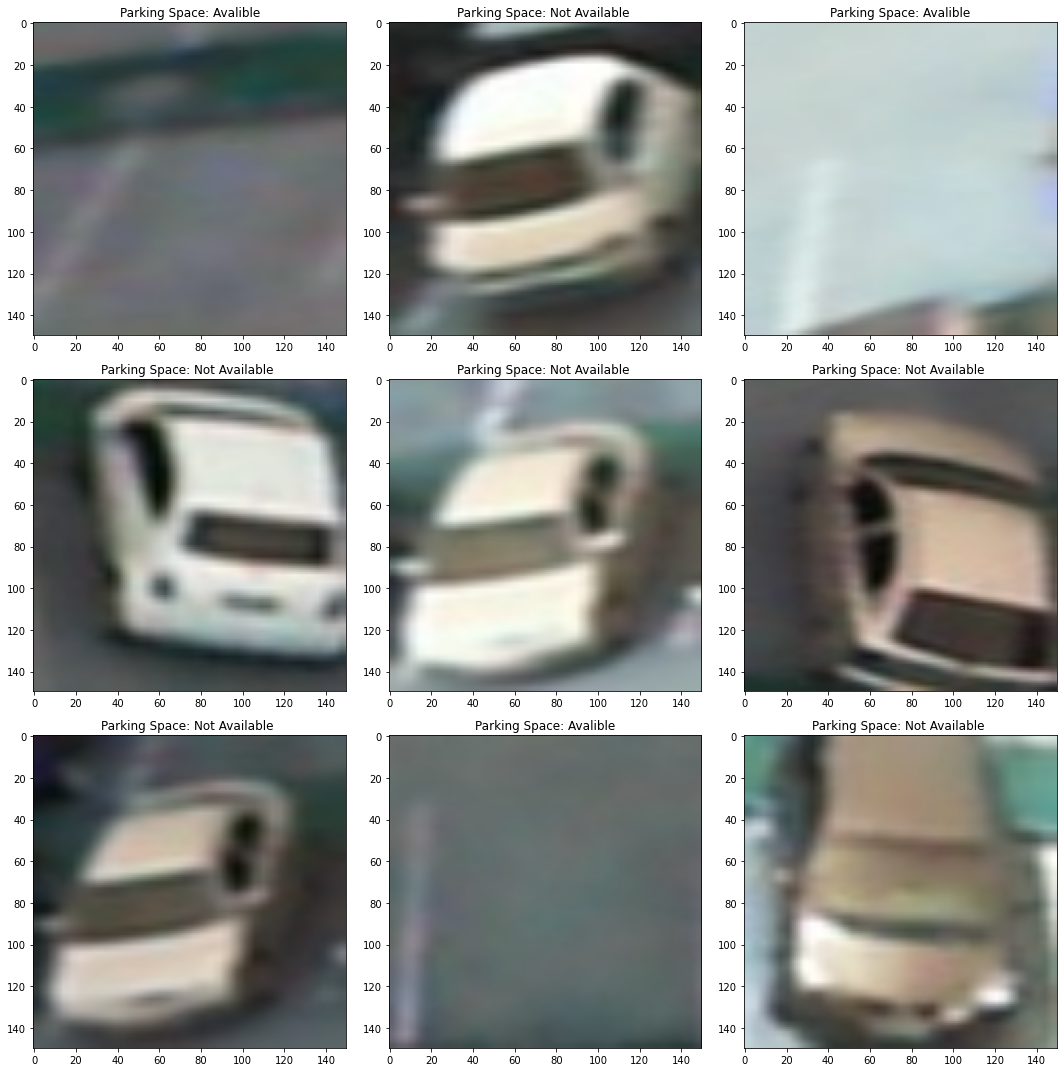

In [3]:
fig,ax=plt.subplots(3,3)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range(3):
        l=rn.randint(0,len(Y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Parking Space: '+Y[l])
plt.tight_layout()

## Splitting 

In [4]:
le=LabelEncoder()
Y=le.fit_transform(Y)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

#splitting train and test into 70 and 30 respectively 

In [5]:
np.random.seed(42)
rn.seed(42)

## ANN

In [6]:
# Import the necessary modules
from keras.models import Sequential
from keras.layers import Flatten, Dense


model = Sequential()                            
# Created a sequential model object

# Add the layers to the model
model.add(Flatten(input_shape=(150, 150, 3)))   # Flatten the input images to a 1D array
model.add(Dense(units=32, activation='relu'))   # Added a fully connected layer with 32 units and ReLU activation function
model.add(Dense(units=32, activation='relu'))   # Added another fully connected layer with 32 units and ReLU activation function
model.add(Dense(units=32, activation='relu'))   # Added another fully connected layer with 32 units and ReLU activation function
model.add(Dense(units=32, activation='relu'))   # Added another fully connected layer with 32 units and ReLU activation function
model.add(Dense(units=2, activation='softmax')) # Added a final fully connected layer with 2 units and softmax activation function

# Compile the model with optimizer, loss function and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 32)                2160032   
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,163,266
Trainable params: 2,163,266
Non-

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
324/324 [==============================] - 15s 42ms/step - loss: 0.2817 - accuracy: 0.9037 - val_loss: 0.0871 - val_accuracy: 0.9761
Epoch 2/10
324/324 [==============================] - 7s 23ms/step - loss: 0.0747 - accuracy: 0.9801 - val_loss: 0.0778 - val_accuracy: 0.9917
Epoch 3/10
324/324 [==============================] - 7s 21ms/step - loss: 0.0455 - accuracy: 0.9865 - val_loss: 0.0237 - val_accuracy: 0.9957
Epoch 4/10
324/324 [==============================] - 7s 22ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.0149 - val_accuracy: 0.9975
Epoch 5/10
324/324 [==============================] - 7s 22ms/step - loss: 0.0635 - accuracy: 0.9763 - val_loss: 0.0131 - val_accuracy: 0.9973
Epoch 6/10
324/324 [==============================] - 7s 22ms/step - loss: 0.0435 - accuracy: 0.9816 - val_loss: 0.0095 - val_accuracy: 0.9984
Epoch 7/10
324/324 [==============================] - 7s 21ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0063 - val_accuracy: 0.998

In [8]:
ann_accuracy=history.history['accuracy'][-1:]
print(ann_accuracy)
#accuracy of ANN model

[0.9944943785667419]


## CNN

In [9]:
model = Sequential()

# Added a convolutional layer with 32 filters, a 5x5 kernel size, same padding, ReLU activation, and input shape of (150, 150, 3)
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(150, 150, 3)))

# Added a max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Added another convolutional layer with 64 filters, a 3x3 kernel size, same padding, and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))

# Added another max pooling layer with a pool size of (2, 2) and a stride of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Added another convolutional layer with 96 filters, a 3x3 kernel size, same padding, and ReLU activation
model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))

# Added another max pooling layer with a pool size of (2, 2) and a stride of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Added another convolutional layer with 96 filters, a 3x3 kernel size, same padding, and ReLU activation
model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))

# Added another max pooling layer with a pool size of (2, 2) and a stride of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output of the previous layer
model.add(Flatten())

# Added a fully connected layer with 512 units and ReLU activation
model.add(Dense(512))
model.add(Activation('relu'))

# Added another fully connected layer with 2 units and softmax activation
model.add(Dense(2, activation='softmax'))

# The model consists of several convolutional layers, each followed by a max pooling layer, to extract features from the input images. The output of the final max pooling layer is flattened and passed through two fully connected layers to perform the final classification.

In [10]:
# ImageDataGenerator to perform data augmentation on the training data
datagen = ImageDataGenerator(
    # Data normalization and preprocessing parameters
    featurewise_center=False,
    samplewise_center=False, 
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False,   
    zca_whitening=False,         
    # Image augmentation parameters
    rotation_range=10,           # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1,            # Randomly zoom image 
    width_shift_range=0.2,       # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,      # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,        # randomly flip images horizontally
    vertical_flip=False          # randomly flip images vertically
)

# Compute the internal statistics of the training data using fit()
datagen.fit(x_train)


In [11]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)      

## Train

In [13]:
batch_size=128
epochs=20

In [14]:
History = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/20
80/80 [==============================] - 134s 2s/step - loss: 0.3202 - accuracy: 0.8719 - val_loss: 0.0529 - val_accuracy: 0.9838
Epoch 2/20
80/80 [==============================] - 130s 2s/step - loss: 0.0253 - accuracy: 0.9928 - val_loss: 0.0065 - val_accuracy: 0.9989
Epoch 3/20
80/80 [==============================] - 133s 2s/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.0047 - val_accuracy: 0.9986
Epoch 4/20
80/80 [==============================] - 130s 2s/step - loss: 0.1218 - accuracy: 0.9587 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 5/20
80/80 [==============================] - 129s 2s/step - loss: 0.0302 - accuracy: 0.9916 - val_loss: 0.0077 - val_accuracy: 0.9991
Epoch 6/20
80/80 [==============================] - 129s 2s/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.0107 - val_accuracy: 0.9991
Epoch 7/20
80/80 [==============================] - 129s 2s/step - loss: 0.0367 - accuracy: 0.9879 - val_loss: 0.0188 - val_accuracy: 0.9982
Epoch 8/20
80

In [15]:
cnn_accuracy=History.history['accuracy'][-1:]
print(cnn_accuracy)

[0.9958924055099487]


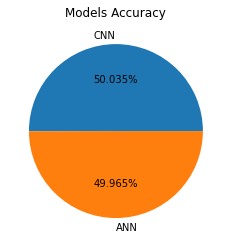

In [38]:
names = ['CNN', 'ANN'] # Label for each pie slice
sizes = [cnn_accuracy[0], ann_accuracy[0]] # accuracy of each model inserted

# new figure and axis
fig, ax = plt.subplots()

# pie chart using the given sizes and labels
ax.pie(sizes, labels=names, autopct='%1.3f%%') 
# autopct formats the percentage to have 3 decimal places

# title for the pie chart
ax.set_title('Fruit Distribution')

plt.show()

# Evaluate model

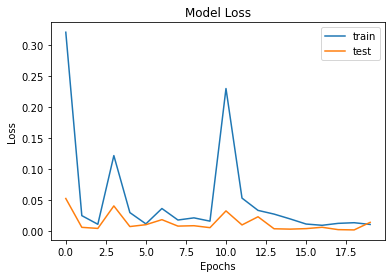

In [16]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

#model loss graph

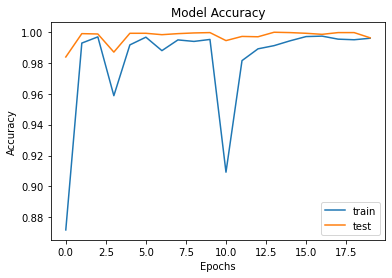

In [17]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

#model accuracy Graph

In [18]:
History.history

{'loss': [0.3202133774757385,
  0.025295499712228775,
  0.011406091041862965,
  0.12183792889118195,
  0.03018135577440262,
  0.012054837308824062,
  0.03673757612705231,
  0.018236925825476646,
  0.021714650094509125,
  0.01642785035073757,
  0.2296847552061081,
  0.05348208546638489,
  0.03372585028409958,
  0.02777179516851902,
  0.020043032243847847,
  0.011783902533352375,
  0.009753240272402763,
  0.012861058115959167,
  0.013913074508309364,
  0.011109882965683937],
 'accuracy': [0.8718826174736023,
  0.9927628636360168,
  0.9967725872993469,
  0.9587286114692688,
  0.9915892481803894,
  0.9965770244598389,
  0.987872838973999,
  0.9948166012763977,
  0.9938386082649231,
  0.995110034942627,
  0.9092420339584351,
  0.9814180731773376,
  0.9890464544296265,
  0.9911002516746521,
  0.9942298531532288,
  0.9969682097434998,
  0.997261643409729,
  0.995305597782135,
  0.9949144124984741,
  0.9958924055099487],
 'val_loss': [0.05286553129553795,
  0.006473598536103964,
  0.0047290651

In [19]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

139/139 [==============================] - 14s 94ms/step


## Proper Classifications 

In [20]:
i=0
proper_class=[]
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        proper_class.append(i)
    if(len(proper_class)==8):
        break

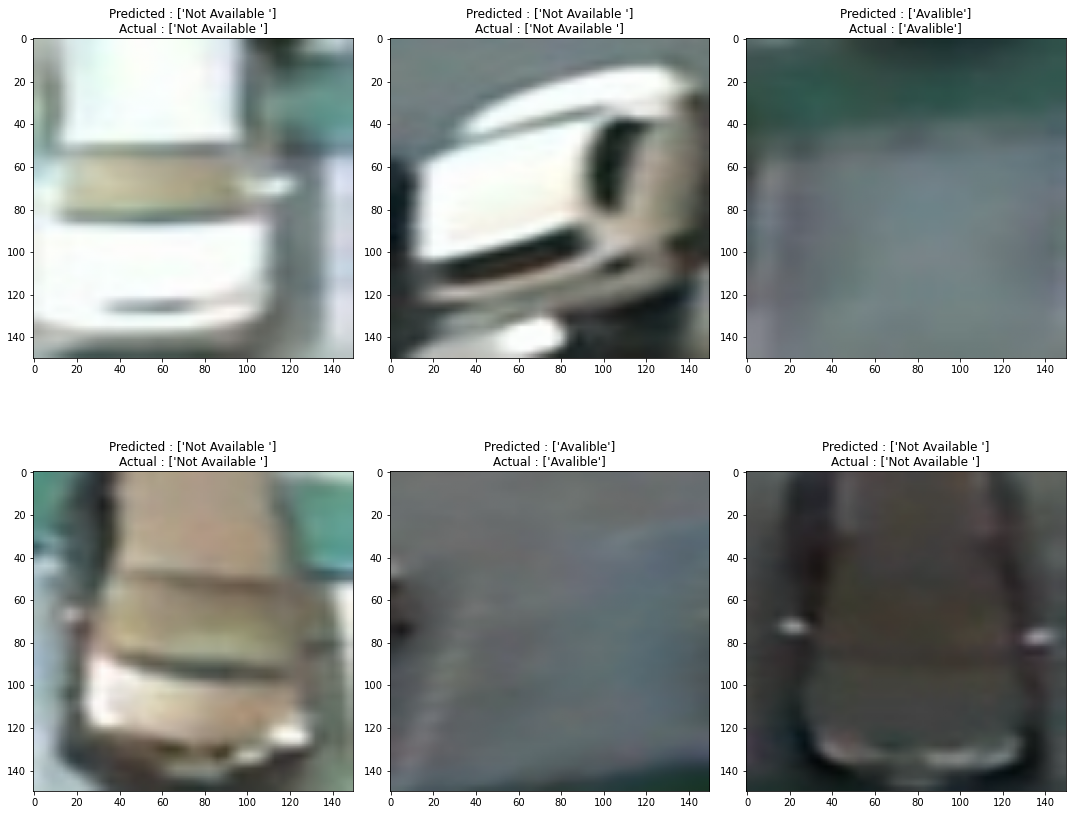

In [21]:
count=0
fig,ax=plt.subplots(2,3)
fig.set_size_inches(15,15)
for i in range (2):
    for j in range (3):
        ax[i,j].imshow(x_test[proper_class[count]])
        ax[i,j].set_title("Predicted : "+str(le.inverse_transform([pred_digits[proper_class[count]]]))+"\n"+"Actual : "+str(le.inverse_transform([np.argmax([y_test[proper_class[count]]])])))
        plt.tight_layout()
        count+=1

## Misclassification 

In [22]:
i=0
mis_class=[]
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

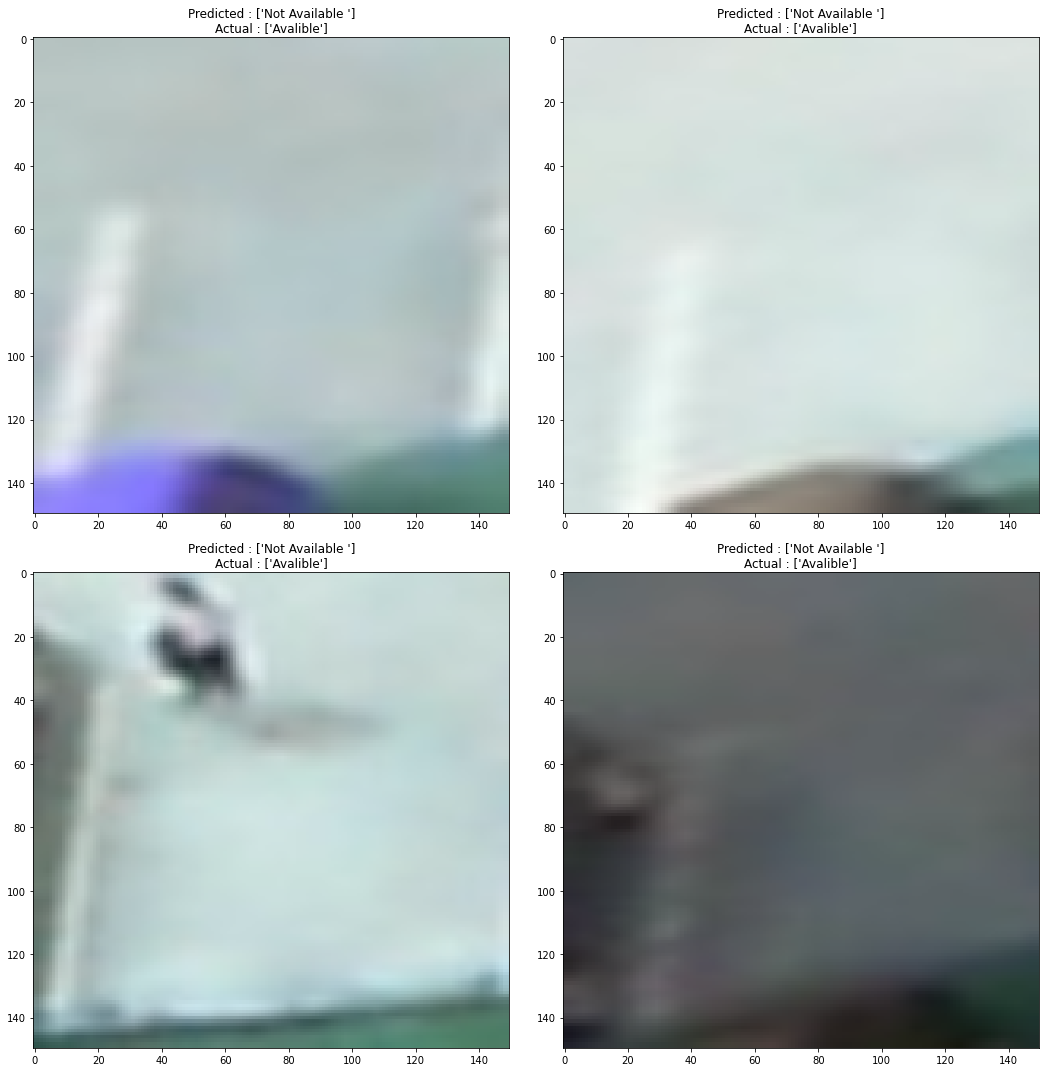

In [23]:
count=0
fig,ax=plt.subplots(2,2)
fig.set_size_inches(15,15)
for i in range (2):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

In [24]:
# Evaluate the performance of the model on the training dataset
model.evaluate(x_train, y_train)

324/324 [==============================] - 33s 101ms/step - loss: 0.0111 - accuracy: 0.9973


[0.011143554002046585, 0.9972954988479614]

In [25]:
# Evaluate the trained model on the test dataset to determine its performance on unseen data
evaluation_results = model.evaluate(x_test, y_test)

139/139 [==============================] - 14s 97ms/step - loss: 0.0145 - accuracy: 0.9962


[0.014493273571133614, 0.9961685538291931]

In [26]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = [ np.argmax(t) for t in y_test ]

#predicted

139/139 [==============================] - 13s 96ms/step


Text(0.5, 103.73999999999997, 'Predicted')

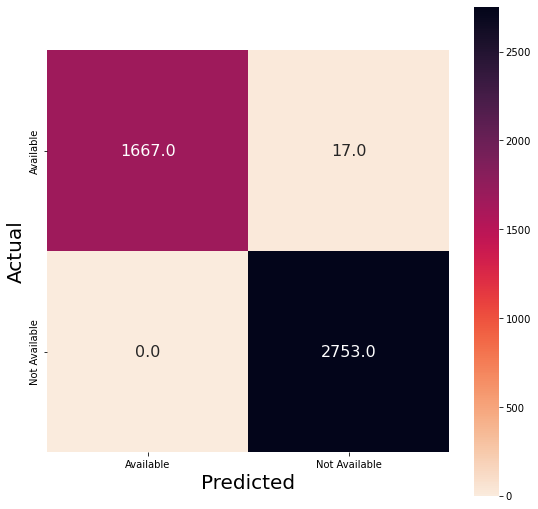

In [27]:
label = ["Available", "Not Available"]
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(9, 9))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

#confusion matrix

In [28]:
model.save('parking_slot_cnn.h5') 

## Sample test

1/1 [==============================] - 0s 114ms/step


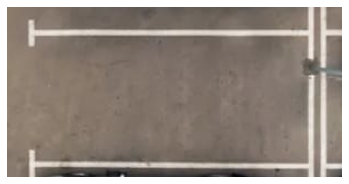

Prediction:  Available 
1/1 [==============================] - 0s 24ms/step


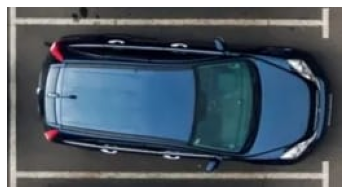

Prediction: Not Available


In [29]:
# Loaded trained model
model = load_model('parking_slot_cnn.h5')

#function 'tester' that takes an image URL as input and predicts its class
def tester(img_url):
    # Read the image using OpenCV and resize it to the required input size of the model
    img = cv2.imread(img_url)
    img = cv2.resize(img, (150, 150))
    # Normalize the pixel values of the image to be in the range [0, 1]
    img = img / 255
    # Add an extra dimension to the image array to match the input shape expected by the model
    img = np.expand_dims(img, axis=0)

    # Use the trained model to predict the class of the input image
    pred = model.predict(img)

    # Map the predicted class index to the corresponding class label
    class_labels = [' Available ','Not Available']
    class_idx = np.argmax(pred[0])
    class_label = class_labels[class_idx]

    # Display the input image and its predicted class label
    plt.imshow(cv2.cvtColor(cv2.imread(img_url), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print('Prediction:', class_label)

# two sample images
tester("sample/predict_1.jpeg")
tester("sample/predict_2.jpeg")